In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Manhattan12.csv')

In [3]:
data.head()

,Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\r\nMENT\r\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\r\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013


In [4]:
data.shape

(27399, 21)

## Rename incorrectly formatted column names

In [5]:
df = data[4:-1]
df.columns = data.iloc[3]
df.columns = df.columns.str.replace('\r\n','')
df.rename(columns={'SALEPRICE': 'SALE_PRICE','APARTMENTNUMBER':'APARTMENT_NUMBER', 'SALE DATE': 'SALE_DATE'}, inplace=True)

df['SALE_PRICE'] = df['SALE_PRICE'].replace('[\$,]', '', regex=True)



c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\temp\ipykernel_19208\3669369039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE_PRICE'] = df['SALE_PRICE'].replace('[\$,]', '', regex=True)


In [6]:
df.columns



Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object', name=3)

### Dropping the columns 'BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'

In [7]:
df.drop(['BOROUGH', 'EASE-MENT', 'APARTMENT_NUMBER'], axis=1, inplace=True)



c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### For each numerical column, remove the , the 'dollar' for the sale price, and then convert them to numeric.

In [8]:
num_cols = ['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
            'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
            'TAX CLASS AT TIME OF SALE', 'SALE_PRICE']
df[num_cols] = df[num_cols].replace('[\$,]', '', regex=True)

c:\users\seikh\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
df[num_cols] = df[num_cols].astype(float)

### Create list of categorical variables and another for the numerical variables¶

In [10]:
cat_list = list(df.select_dtypes(include=['object']).columns)
num_list = list(df.select_dtypes(include=['int', 'float']).columns)


In [11]:
cat_list


['NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE_DATE']

In [12]:
num_list

['BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'SALE_PRICE']

### Convert SALE DATE to datetime datatype¶

In [13]:
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], format='%d/%m/%Y')

C:\temp\ipykernel_19208\225433859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], format='%d/%m/%Y')


In [14]:
print(df['SALE_DATE'].dtype)

datetime64[ns]


### For each categorical variable, remove the spaces, and then replace the empty string '' by NaN

In [15]:
df[cat_list] = df[cat_list].applymap(lambda x: x.strip() if isinstance(x, str) else x)
df[cat_list] = df[cat_list].replace('', pd.NA)

### Replace the zeros in Prices, Land squares, etc. by NaN

In [16]:
df[num_cols] = df[num_cols].replace(0, pd.NA)

### Show a summary of all missing values as well as the summary statistics

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27394 entries, 4 to 27397
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    27377 non-null  object        
 1   BUILDING CLASS CATEGORY         23940 non-null  object        
 2   TAX CLASS AT PRESENT            27251 non-null  object        
 3   BLOCK                           27394 non-null  float64       
 4   LOT                             27394 non-null  float64       
 5   BUILDING CLASS AT PRESENT       27251 non-null  object        
 6   ADDRESS                         27394 non-null  object        
 7   ZIP CODE                        27393 non-null  object        
 8   RESIDENTIAL UNITS               11023 non-null  object        
 9   COMMERCIAL UNITS                3433 non-null   object        
 10  TOTAL UNITS                     17691 non-null  object        
 11  LA

In [18]:
df.describe()

3,BLOCK,LOT,TAX CLASS AT TIME OF SALE
count,27394.000000,27394.000000,27394.000000
mean,1109.627656,741.813390,2.488063
std,465.958098,819.427506,0.891692
min,7.000000,1.000000,1.000000
25%,877.000000,37.000000,2.000000
50%,1047.000000,1007.000000,2.000000
75%,1411.000000,1233.000000,4.000000
max,2250.000000,9117.000000,4.000000


### dropping duplicates

In [19]:
df.drop_duplicates(inplace=True)

C:\temp\ipykernel_19208\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [20]:
df.shape

(25801, 18)

### dropping rows with NaN

In [21]:
df.dropna(inplace=True)

C:\temp\ipykernel_19208\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [22]:
df.shape


(470, 18)

### identify and remove outliers if any and showing shape

In [23]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]

In [24]:
df.shape


(467, 18)

### Consider the log of the prices and normalise the data

In [25]:
df['SALE_PRICE'] = np.log(df['SALE_PRICE'].astype('float64'))

### Creating Neighborhood vs Price scatter plot visualization

In [26]:
short_names = {}
for value in df['NEIGHBORHOOD'].unique():
    short_name = value[0]
    short_names[value] = short_name

df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].replace(short_names)


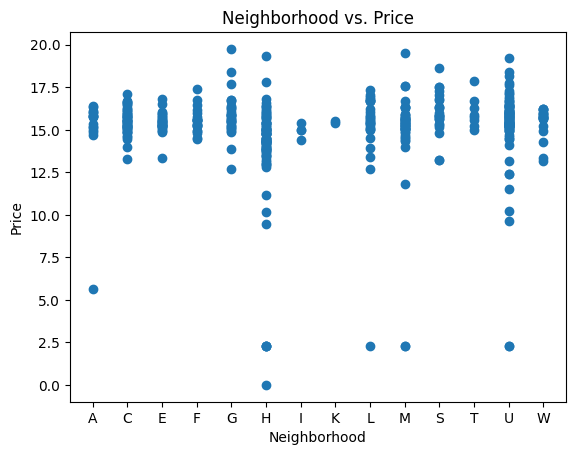

<Figure size 1500x1500 with 0 Axes>

In [27]:
plt.scatter(df['NEIGHBORHOOD'], df['SALE_PRICE'])
plt.title('Neighborhood vs. Price')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.figure(figsize=(15,15))
plt.show()

### Creating SALE PRICE vs SALE DATE visualization

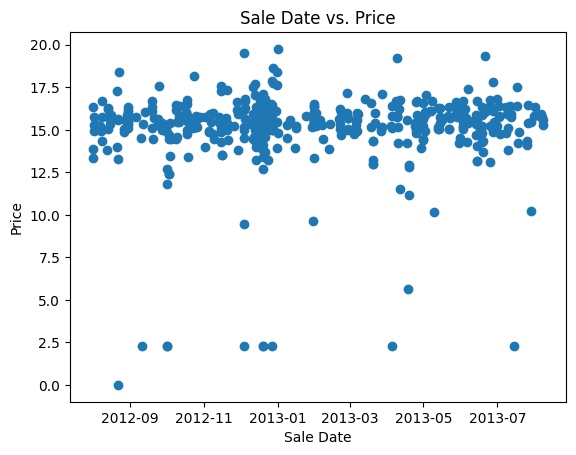

<Figure size 1500x1500 with 0 Axes>

In [28]:
plt.scatter(df['SALE_DATE'], df['SALE_PRICE'])
plt.title('Sale Date vs. Price')
plt.xlabel('Sale Date')
plt.ylabel('Price')
plt.figure(figsize=(15,15))
plt.show()